# Problem 2

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
np.random.seed(1)
%matplotlib inline

In [2]:
# Set the names of the columns for the two datasets

names_iris = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width', 'Class']
names_indians = ['Times Pregnant', 'Glucose Concentration', 'Blood Pressure', 'Skin Thickness',
                 'Serum Insulin', 'BMI', 'Pedigree Function', 'Age', 'Class']

In [3]:
# Read the files into dataframes

df_iris = pd.read_csv('iris.csv', names=names_iris)
df_indians = pd.read_csv('pima-indians-diabetes.csv', names=names_indians)

In [4]:
df_iris.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df_indians.head()

,Times Pregnant,Glucose Concentration,Blood Pressure,Skin Thickness,Serum Insulin,BMI,Pedigree Function,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df_iris.dtypes

Sepal Length    float64
Sepal Width     float64
Petal Length    float64
Petal Width     float64
Class            object
dtype: object

In [7]:
# Convert the class of the Iris dataset to numerical type

df_iris['Class'] = df_iris['Class'].map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})

In [8]:
df_indians.dtypes

Times Pregnant             int64
Glucose Concentration      int64
Blood Pressure             int64
Skin Thickness             int64
Serum Insulin              int64
BMI                      float64
Pedigree Function        float64
Age                        int64
Class                      int64
dtype: object

In [9]:
# Display the number of null data observations

print('NaNs in Iris dataset:', df_iris.isnull().values.sum())
print('NaNs in Pima-Indians-Diabetes dataset:', df_indians.isnull().values.sum())

NaNs in Iris dataset: 0
NaNs in Pima-Indians-Diabetes dataset: 0


In [10]:
# Create X and y for both datasets

X_iris = df_iris.iloc[:, :-1]
bias_iris = np.ones([len(df_iris), 1])
X_iris = np.concatenate((bias_iris, X_iris), axis=1)
Y_iris = df_iris.iloc[:, -1].values

X_indians = df_indians.iloc[:, :-1]
bias_indians = np.ones([len(df_indians), 1])
X_indians = np.concatenate((bias_indians, X_indians), axis=1)
Y_indians = df_indians.iloc[:, -1].values

## Problem 2 Part 1

In [11]:
def distance(x1, x2):
    distance = 0
    for i in range(len(x1)):
        distance += np.square(x1[i] - x2[i])
    distance = np.sqrt(distance)
    return distance

In [12]:
def kNN_accuracy(X_train, Y_train, X_test, Y_test, k):
    counter = 0
    predicted_class = np.zeros(len(X_test))
    for i in range(len(X_test)):
        point_distance = np.zeros([len(X_train), 2])
        for j in range(len(X_train)):
            point_distance[j, 0] = distance(X_train[j, :], X_test[i, :])
            point_distance[j, 1] = Y_train[j]    
        sorted_distance = point_distance[point_distance[:, 0].argsort()]
        neighbors = np.zeros([k, 2])
        no_of_classes = len(np.unique(Y_test))
        votes = np.zeros(no_of_classes, dtype=np.int)
        for x in range(k):
            neighbors[x, :] = sorted_distance[x, :] 
            neighbor_label = sorted_distance[x, 1].astype(int)
            votes[neighbor_label] += 1
        predicted_class[i] = np.argmax(votes)
        if (predicted_class[i] == Y_test[i]):
            counter += 1
    accuracy = counter / len(X_test)
    return accuracy

In [13]:
from sklearn.model_selection import KFold 

In [14]:
def CV_accuracy_as_function_of_k(X, Y):
    cv_accuracies = np.zeros([20, 2])
    for l in range(1, 21):
        kf = KFold(n_splits=5, shuffle=True)
        sum = 0
        for train, test in kf.split(X_iris):
            X_train, X_test, Y_train, Y_test = X[train], X[test], Y[train], Y[test]
            sum += kNN_accuracy(X_train, Y_train, X_test, Y_test, l)
        average_accuracy = sum/5
        cv_accuracies[l - 1, 0] = average_accuracy
        cv_accuracies[l - 1, 1] = l
    return cv_accuracies

In [15]:
iris_accuracies = CV_accuracy_as_function_of_k(X_iris, Y_iris)

In [16]:
indians_accuracies = CV_accuracy_as_function_of_k(X_indians, Y_indians)

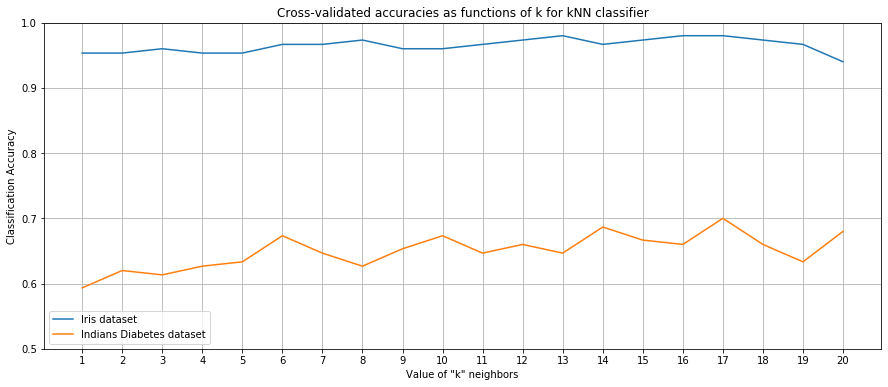

In [17]:
plt.figure(figsize=(15, 6))
plt.plot(iris_accuracies[:, 1], iris_accuracies[:, 0], label='Iris dataset')
plt.plot(indians_accuracies[:, 1], indians_accuracies[:, 0], label='Indians Diabetes dataset')
plt.xlabel('Value of "k" neighbors')
plt.xticks(iris_accuracies[:, 1])
plt.ylabel('Classification Accuracy')
plt.ylim([0.5, 1])
plt.grid()
plt.title('Cross-validated accuracies as functions of k for kNN classifier')
plt.legend()
plt.show()

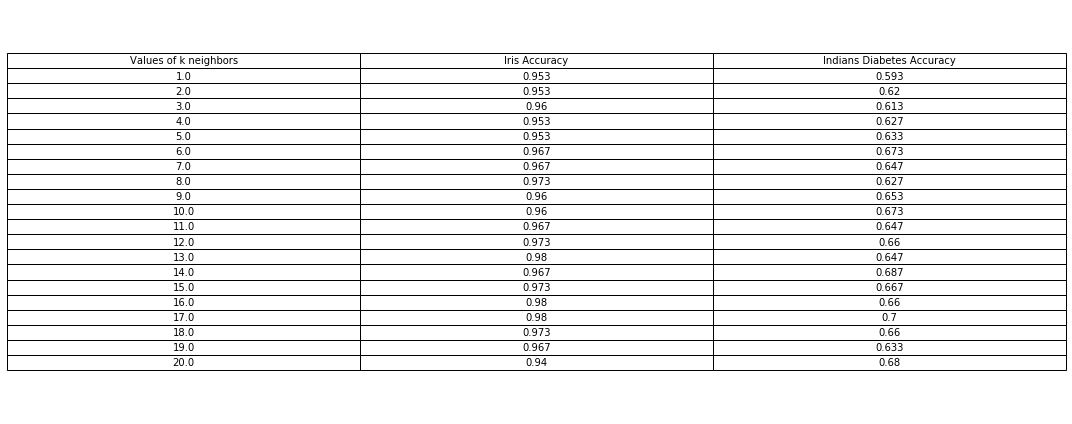

In [18]:
df = pd.DataFrame(np.column_stack((iris_accuracies.round(3), indians_accuracies.round(3))), 
                  columns=['Iris Accuracy', 'Values of k neighbors', 
                           'Indians Diabetes Accuracy', 'Values of k neighbors_2'])
df = df[['Values of k neighbors', 'Iris Accuracy', 'Indians Diabetes Accuracy']]
fig, ax = plt.subplots(figsize=(15, 6))
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')
ax.table(cellText=df.values, colLabels=df.columns, loc='center', cellLoc='center')
fig.tight_layout()
plt.show()

## Problem 2 Part 2

Since we assume that the probability density functions of the two classes follow normal distribution, if we also make the assumption that the two datasets contain equiprobable classes, then the Bayesian classification problem is essentially a minimum Mahalanobis distance classification problem.

In [19]:
count_classes_iris = np.zeros([len(np.unique(Y_iris)), 2])
unique, counts = np.unique(Y_iris, return_counts=True)
count_classes_iris = np.asarray((unique, counts))
count_classes_iris

array([[ 0,  1,  2],
       [50, 50, 50]])

In [20]:
count_classes_indians = np.zeros([len(np.unique(Y_indians)), 2])
unique, counts = np.unique(Y_indians, return_counts=True)
count_classes_indians = np.asarray((unique, counts))
count_classes_indians

array([[  0,   1],
       [500, 268]])

We can see that the assumption that the datasets contain equiprobable classes holds true for the Iris dataset but not for the Indians Diabetes dataset. However, we will assume that it does, modify the kNN classifier accordingly and see the results.

### Implementation for the Iris dataset

In [21]:
X_iris = df_iris.values[:, 0:4]

In [22]:
index_0 = df_iris.Class == 0
index_1 = df_iris.Class == 1
index_2 = df_iris.Class == 2

In [23]:
mean_0 = np.mean(X_iris[index_0, :], axis = 0)
mean_1 = np.mean(X_iris[index_1, :], axis = 0)
mean_2 = np.mean(X_iris[index_2, :], axis = 0)
cov_0 = np.cov(X_iris[index_0, :].T)
cov_1 = np.cov(X_iris[index_1, :].T)
cov_2 = np.cov(X_iris[index_2, :].T)

In [24]:
import math
def mahalanobis(p, mean, cov):
    dif = p - mean
    return math.sqrt(np.dot(np.dot(dif.T, np.linalg.inv(cov)), dif))

In [25]:
from sklearn.model_selection import KFold
def CV_bayesian_accuracy(X, Y):
    kf = KFold(n_splits=5, shuffle=True)
    sum = 0
    for train, test in kf.split(X_iris):
        X_train, X_test, Y_train, Y_test = X[train], X[test], Y[train], Y[test]
        predicted_class = np.zeros(len(X_test))
        no_of_classes = len(np.unique(Y_test))
        votes = np.zeros(no_of_classes, dtype=np.int)
        counter = 0
        for i in range(X_test.shape[0]):
            dist_0 = mahalanobis(X_test[i, :], mean_0, cov_0)
            dist_1 = mahalanobis(X_test[i, :], mean_1, cov_1)
            dist_2 = mahalanobis(X_test[i, :], mean_2, cov_2)
            predicted_class[i] = np.argmin([dist_0, dist_1, dist_2]).astype(int)
            if (predicted_class[i] == Y_test[i]):
                counter += 1
        accuracy = counter / len(X_test)
        sum += accuracy
    average_accuracy = sum/5
    return average_accuracy

In [26]:
iris_accuracy = CV_bayesian_accuracy(X_iris, Y_iris)
iris_accuracy

0.9800000000000001

### Implementation for the Indians Diabetes dataset

In [27]:
X_indians = df_indians.values[:, 0:4]

In [28]:
index_0 = df_indians.Class == 0
index_1 = df_indians.Class == 1

In [29]:
mean_0 = np.mean(X_indians[index_0, :], axis = 0)
mean_1 = np.mean(X_indians[index_1, :], axis = 0)
cov_0 = np.cov(X_indians[index_0, :].T)
cov_1 = np.cov(X_indians[index_1, :].T)

In [30]:
import math
def mahalanobis(p, mean, cov):
    dif = p - mean
    return math.sqrt(np.dot(np.dot(dif.T, np.linalg.inv(cov)), dif))

In [31]:
from sklearn.model_selection import KFold
def CV_bayesian_accuracy(X, Y):
    kf = KFold(n_splits=5, shuffle=True)
    sum = 0
    for train, test in kf.split(X_iris):
        X_train, X_test, Y_train, Y_test = X[train], X[test], Y[train], Y[test]
        predicted_class = np.zeros(len(X_test))
        no_of_classes = len(np.unique(Y_test))
        votes = np.zeros(no_of_classes, dtype=np.int)
        counter = 0
        for i in range(X_test.shape[0]):
            dist_0 = mahalanobis(X_test[i, :], mean_0, cov_0)
            dist_1 = mahalanobis(X_test[i, :], mean_1, cov_1)
            predicted_class[i] = np.argmin([dist_0, dist_1]).astype(int)
            if (predicted_class[i] == Y_test[i]):
                counter += 1
        accuracy = counter / len(X_test)
        sum += accuracy
    average_accuracy = sum/5
    return average_accuracy

In [32]:
indians_accuracy = CV_bayesian_accuracy(X_indians, Y_indians)
indians_accuracy

0.6599999999999999

Indeed, as we expected, the Bayesian Classifier based on minimum Mahalanobis distance works extremely well for the Iris dataset, since its classes are equiprobable, while it performs poorly for the Indians Diabetes dataset, since its classes are imbalanced. However, it should be noted that the Bayesian Classifier works exactly as well as the kNN classifier with k neighbors equal to 13, 16 and 17 and perhaps this is the maximum performance that can be achieved (98%). Furthermore, concerning the Indians Diabetes dataset, the performance of the Bayesian Classifier (66%) is better than that of the kNN classifier for quite a few different values of k.

## Problem 2 Part 3

In [33]:
class Naive_Bayes:
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self._classes = np.unique(y)
        n_classes = len(self._classes)
        # calculate mean, var, and prior for each class
        self._mean = np.zeros((n_classes, n_features), dtype=np.float64)
        self._var = np.zeros((n_classes, n_features), dtype=np.float64)
        self._priors =  np.zeros(n_classes, dtype=np.float64)
        for c in self._classes:
            X_c = X[y==c]
            self._mean[c, :] = X_c.mean(axis=0)
            self._var[c, :] = X_c.var(axis=0)
            self._priors[c] = X_c.shape[0] / float(n_samples)
            
    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        posteriors = []

        for idx, c in enumerate(self._classes):
            prior = np.log(self._priors[idx])
            posterior = np.sum(np.log(self._pdf(idx, x)))
            posterior = prior + posterior
            posteriors.append(posterior)
            
        return self._classes[np.argmax(posteriors)]
            
    def _pdf(self, class_idx, x):
        mean = self._mean[class_idx]
        var = self._var[class_idx]
        numerator = np.exp(- (x-mean)**2 / (2 * var))
        denominator = np.sqrt(2 * np.pi * var)
        return numerator / denominator

In [34]:
def compute_accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

In [35]:
from sklearn.model_selection import KFold
def CV_naive_bayes_accuracy(X, Y):
    kf = KFold(n_splits=5, shuffle=True)
    sum = 0
    for train, test in kf.split(X_iris):
        X_train, X_test, Y_train, Y_test = X[train], X[test], Y[train], Y[test]
        naive_bayes = Naive_Bayes()
        naive_bayes.fit(X_train, Y_train)
        predictions = naive_bayes.predict(X_test)
        accuracy = compute_accuracy(Y_test, predictions)
        sum += accuracy
    average_accuracy = sum/5
    return average_accuracy

In [36]:
iris_accuracy = CV_naive_bayes_accuracy(X_iris, Y_iris)
iris_accuracy

0.9466666666666667

In [37]:
indians_accuracy = CV_naive_bayes_accuracy(X_indians, Y_indians)
indians_accuracy

0.72

The Naive Bayes classifier works better than the Bayes classifier based on minimum Mahalanobis distance for the Indians Diabetes dataset (72% compared to 66%), but not for the Iris dataset (94,67% compared to 98%). 

Overall, the Naive Bayes is the best classifier for the Indians Diabetes dataset (72%), while the kNN (for k equal to 13, 16, 17) and the Bayesian classifier based on minimum Mahalanobis distance are the best classifiers for the Iris dataset (98%).

## Problem 2 Part 4

In [38]:
def perceptron(X, Y, epochs, mu=1):
    W = np.zeros(len(X[0]))
    for n in range(epochs):
        for i, x in enumerate(X):
            error = X[i] @ W * Y[i]
            if error <= 0:
                W += mu * X[i] * Y[i]
    return W

In [39]:
def predict(z):
    for i in range(len(z)):
        if z[i] >= 0:
            z[i] = 1
        else:
            z[i] = -1
    return z

In [40]:
def linear_separability(X, Y, epochs, sep_class, mu=1):
    if sep_class=='Iris-setosa':
        sep_y = 0
        other_classes = 'Iris-versicolor and Iris-virginica'
    elif sep_class=='Iris-versicolor':
        sep_y = 1
        other_classes = 'Iris-setosa and Iris-virginica'
    elif sep_class=='Iris-virginica':
        sep_y = 2
        other_classes = 'Iris-setosa and Iris-versicolor'
    else:
        print('Insert a valid class from the following: ',
              '"Iris-setosa", "Iris-versicolor", "Iris-virginica"')
    Y_sep = np.ndarray.copy(Y)
    for y in range(len(Y_sep)):
        if Y_sep[y] == sep_y:
            Y_sep[y] = 1
        else:
            Y_sep[y] = -1
    weights = perceptron(X, Y_sep, epochs, mu)
    z = X @ weights.T
    y_predicted = predict(z)
    if np.array_equal(y_predicted, Y_sep):
        print('The perceptron was ABLE to linearly separate class {} from classes {}'\
              ' after running for {} epochs.'.format(sep_class, other_classes, epochs),
              'The final weight vector is {}'.format(np.array2string(weights, separator=', ')))
    else:
        print('The perceptron was UNABLE to linearly separate class {} from classes {}'\
              ' after running for {} epochs.'.format(sep_class, other_classes, epochs),
              'The final weight vector is {}'.format(np.array2string(weights, separator=', ')))

In [41]:
linear_separability(X_iris, Y_iris, 1000, 'Iris-setosa')

The perceptron was ABLE to linearly separate class Iris-setosa from classes Iris-versicolor and Iris-virginica after running for 1000 epochs. The final weight vector is [ 1.3,  4.1, -5.2, -2.2]


In [42]:
linear_separability(X_iris, Y_iris, 1000, 'Iris-versicolor')

The perceptron was UNABLE to linearly separate class Iris-versicolor from classes Iris-setosa and Iris-virginica after running for 1000 epochs. The final weight vector is [  39. ,  -57.6,   13.1, -140.1]


In [43]:
linear_separability(X_iris, Y_iris, 1000, 'Iris-virginica')

The perceptron was UNABLE to linearly separate class Iris-virginica from classes Iris-setosa and Iris-versicolor after running for 1000 epochs. The final weight vector is [-141.1, -144.9,  190.1,  257.7]
